In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [23]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

In [24]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [25]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=8)

In [26]:
li=LinearRegression()

In [27]:
li.fit(x_train,y_train)

LinearRegression()

In [28]:
from sklearn.metrics import r2_score

In [29]:
y_pred=li.predict(x_test)

In [30]:
r2_score(y_test,y_pred)

0.4973499720118181

In [37]:
coef=[]
r2s=[]
for i in [0,1,100,1000]:
    l=Lasso(alpha=i)
    l.fit(x_train,y_train)
    coef.append(l.coef_.tolist())
    y1_pred=l.predict(x_test)
    r2s.append(r2_score(y_test,y1_pred))
    
    

C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+05, tolerance: 2.101e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

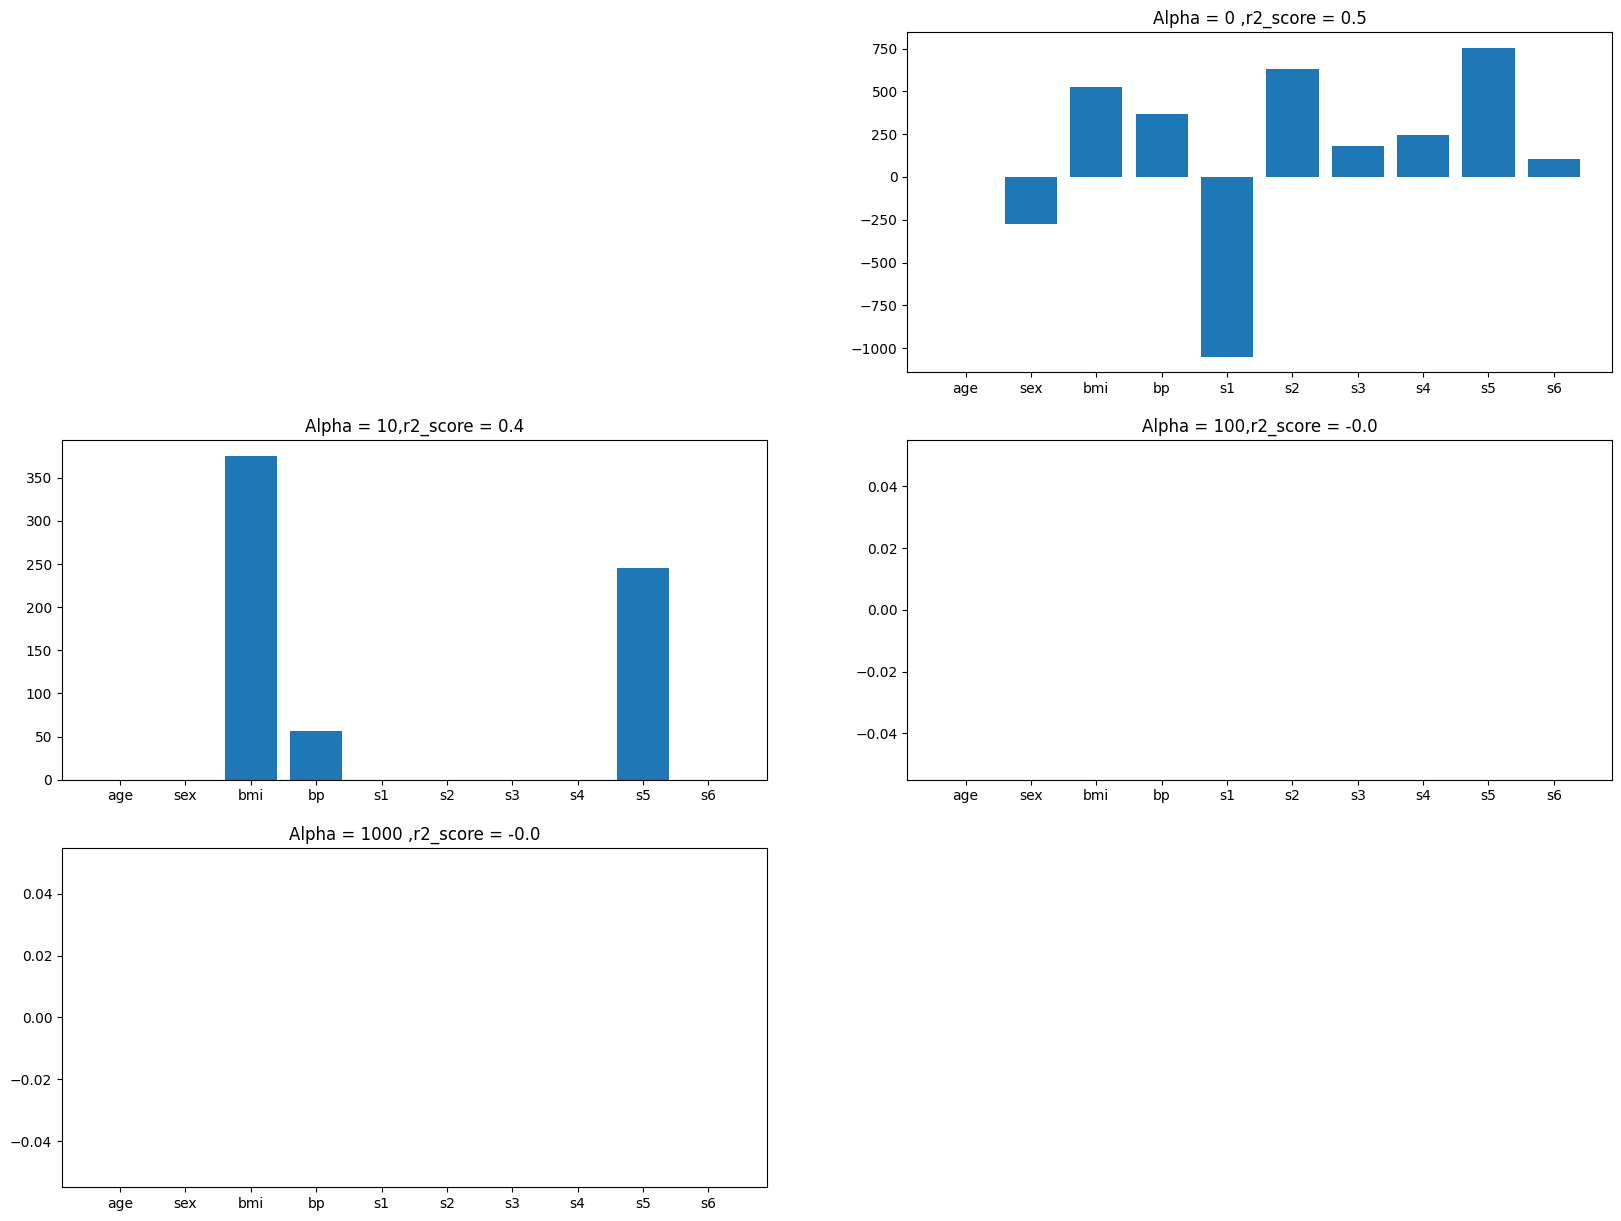

In [45]:
plt.figure(figsize=(20,15))
plt.subplot(322)
plt.bar(data.feature_names,coef[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2s[0],2)))

plt.subplot(323)
plt.bar(data.feature_names,coef[1])
plt.title('Alpha = 10,r2_score = {}'.format(round(r2s[1],2)))

plt.subplot(324)
plt.bar(data.feature_names,coef[2])
plt.title('Alpha = 100,r2_score = {}'.format(round(r2s[2],2)))


plt.subplot(325)
plt.bar(data.feature_names,coef[3])
plt.title(f'Alpha = 1000 ,r2_score = {round(r2s[3],2)}')
plt.show()


In [48]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+05, tolerance: 2.101e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

In [49]:
input_array = np.array(coefs)

In [50]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-2.603352,-272.686272,523.441984,368.894652,-1049.117792,627.605206,183.117969,243.482610,754.714827,106.827226
0.0001,-2.461459,-272.570311,523.473244,368.835592,-1041.575132,621.781505,179.572288,242.216671,752.029392,106.769939
0.0010,-1.184663,-271.526879,523.754351,368.304050,-973.718836,569.389988,147.673255,230.826520,727.870591,106.254464
0.0100,0.000000,-259.156152,528.679984,364.838409,-539.740914,220.554866,-28.265670,186.593436,568.656672,103.465745
0.1000,0.000000,-178.756716,521.683262,321.123047,-97.006518,-0.000000,-232.473685,0.000000,430.347002,73.966181
1.0000,0.000000,-0.000000,375.077154,56.890755,0.000000,0.000000,-0.000000,0.000000,245.371877,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [52]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+05, tolerance: 2.101e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

In [53]:
input_array = np.array(coefs).T

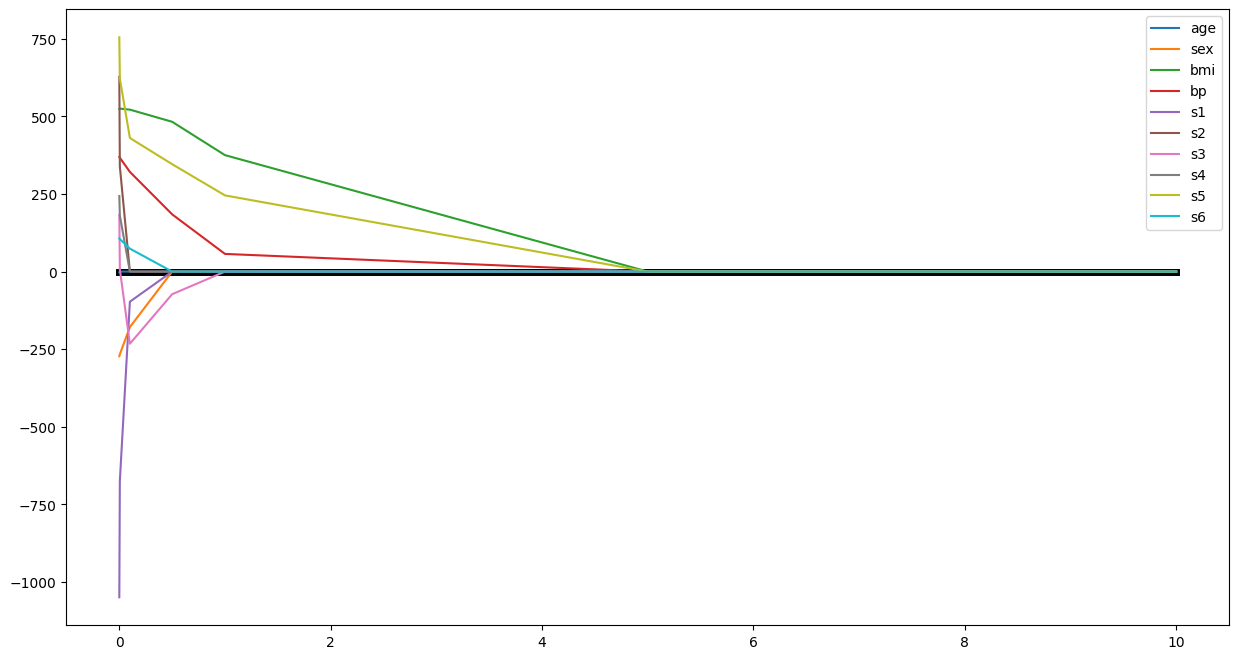

In [54]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()